<a href="https://colab.research.google.com/github/Neuro-Algorithm/Mouse-Pose-Estimation/blob/main/Mouse_Behavioural_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from base64 import b64encode
from IPython.display import HTML
import glob


In [2]:
import pandas as pd

# Define the h5 file path
h5_file = '/content/t8SB0nr_JnsQzHam_superanimal_quadruped_hrnet_w32_fasterrcnn_resnet50_fpn_v2_.h5'

# Load the data
df = pd.read_hdf(h5_file)

# Get frame data
frame_data = df.iloc[0]

# Extract animal0 data
animal_data = frame_data['superanimal_quadruped_hrnet_w32_fasterrcnn_resnet50_fpn_v2_']['animal0']

# See what bodyparts are available
print("Available bodyparts:")
for bp in animal_data.index.get_level_values(0).unique():
    print(f"  - {bp}")

Available bodyparts:
  - nose
  - upper_jaw
  - lower_jaw
  - mouth_end_right
  - mouth_end_left
  - right_eye
  - right_earbase
  - right_earend
  - right_antler_base
  - right_antler_end
  - left_eye
  - left_earbase
  - left_earend
  - left_antler_base
  - left_antler_end
  - neck_base
  - neck_end
  - throat_base
  - throat_end
  - back_base
  - back_end
  - back_middle
  - tail_base
  - tail_end
  - front_left_thai
  - front_left_knee
  - front_left_paw
  - front_right_thai
  - front_right_knee
  - front_right_paw
  - back_left_paw
  - back_left_thai
  - back_right_thai
  - back_left_knee
  - back_right_knee
  - back_right_paw
  - belly_bottom
  - body_middle_right
  - body_middle_left


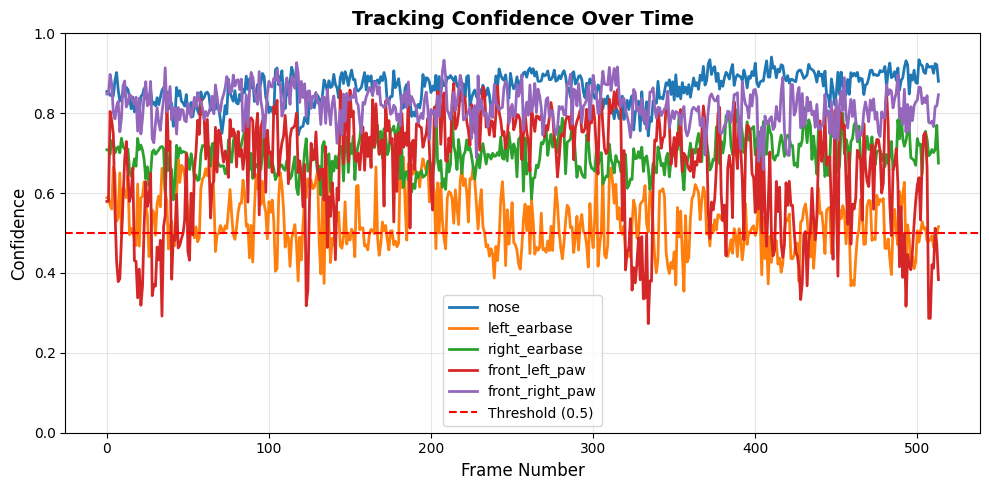


TRACKING QUALITY SUMMARY:
nose                : Mean=0.864, Above 0.5: 100.0%
left_earbase        : Mean=0.528, Above 0.5: 60.5%
right_earbase       : Mean=0.698, Above 0.5: 100.0%
front_left_paw      : Mean=0.663, Above 0.5: 83.7%
front_right_paw     : Mean=0.818, Above 0.5: 100.0%


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load tracking data
h5_file = '/content/t8SB0nr_JnsQzHam_superanimal_quadruped_hrnet_w32_fasterrcnn_resnet50_fpn_v2_.h5'
df = pd.read_hdf(h5_file)

# Analyze confidence across all frames
scorer = 'superanimal_quadruped_hrnet_w32_fasterrcnn_resnet50_fpn_v2_'
bodyparts = ['nose', 'left_earbase', 'right_earbase', 'front_left_paw', 'front_right_paw']

plt.figure(figsize=(10, 5))

for bodypart in bodyparts:
    confidences = df[scorer]['animal0'][bodypart]['likelihood'].values
    plt.plot(confidences, label=bodypart, linewidth=2)

plt.axhline(y=0.5, color='r', linestyle='--', label='Threshold (0.5)')
plt.xlabel('Frame Number', fontsize=12)
plt.ylabel('Confidence', fontsize=12)
plt.title('Tracking Confidence Over Time', fontsize=14, weight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim([0, 1])
plt.tight_layout()
plt.show()

# Summary statistics
print("\nTRACKING QUALITY SUMMARY:")
for bodypart in bodyparts:
    confidences = df[scorer]['animal0'][bodypart]['likelihood'].values
    mean_conf = np.mean(confidences)
    above_threshold = np.sum(confidences > 0.5) / len(confidences) * 100
    print(f"{bodypart:20s}: Mean={mean_conf:.3f}, Above 0.5: {above_threshold:.1f}%")

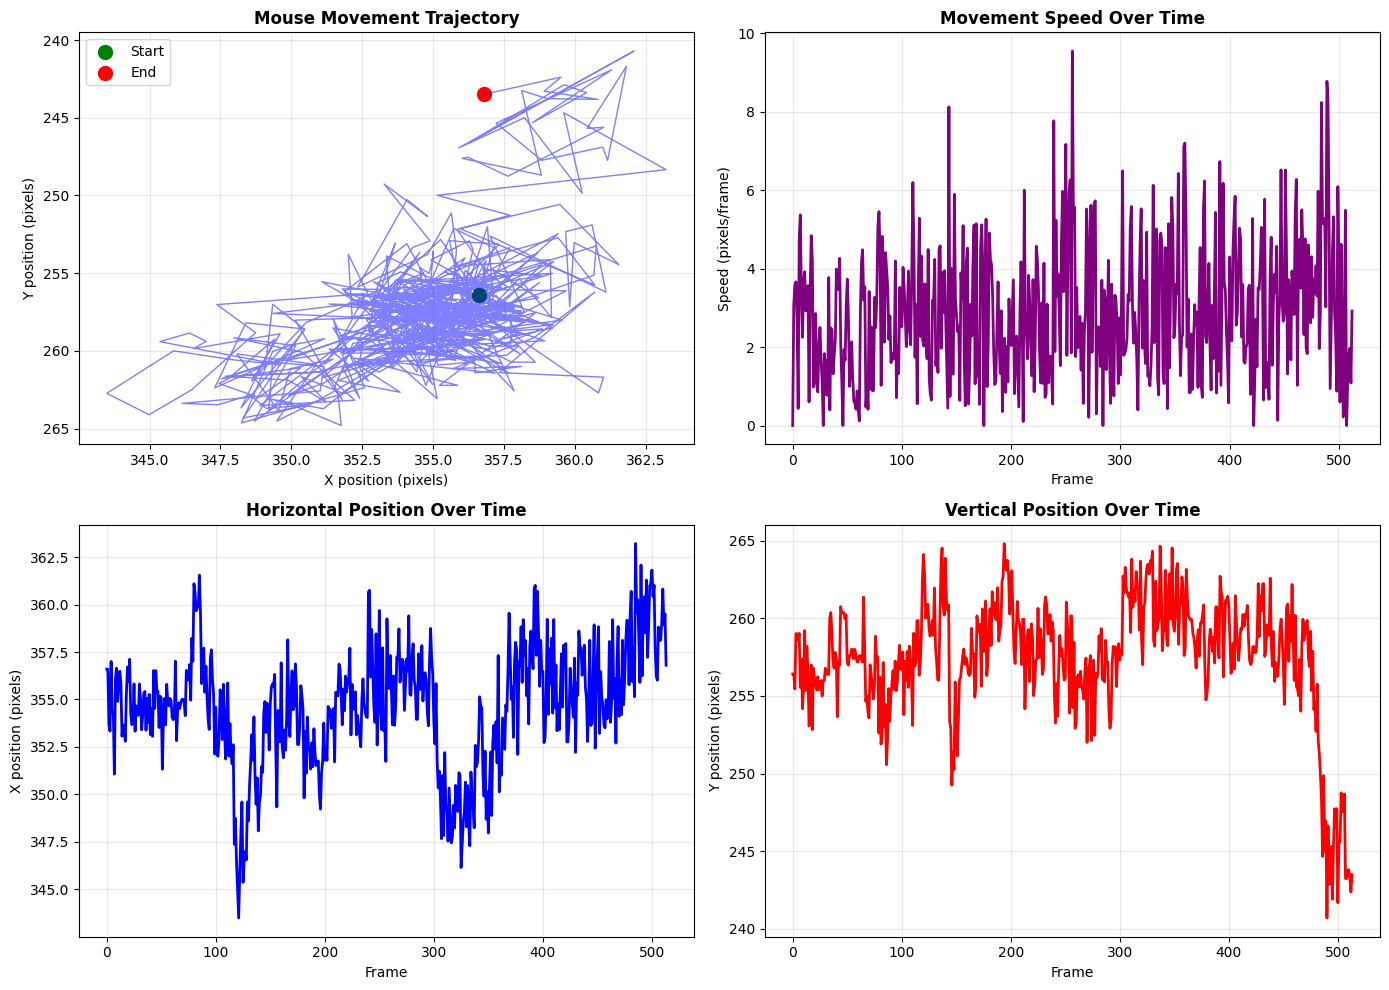

BEHAVIORAL METRICS
Total frames analyzed: 514
Total distance traveled: 1485.0 pixels
Average speed: 2.89 pixels/frame
Max speed: 9.55 pixels/frame
Time stationary (<2 px/frame): 33.7%


In [8]:
# Load data
h5_file = '/content/t8SB0nr_JnsQzHam_superanimal_quadruped_hrnet_w32_fasterrcnn_resnet50_fpn_v2_.h5'
df = pd.read_hdf(h5_file)

scorer = 'superanimal_quadruped_hrnet_w32_fasterrcnn_resnet50_fpn_v2_'

# Extract nose position (for movement analysis)
nose_x = df[scorer]['animal0']['nose']['x'].values
nose_y = df[scorer]['animal0']['nose']['y'].values
nose_conf = df[scorer]['animal0']['nose']['likelihood'].values

# Filter by confidence
threshold = 0.5
mask = nose_conf > threshold
nose_x_filtered = nose_x[mask]
nose_y_filtered = nose_y[mask]

# Calculate speed (pixels per frame)
dx = np.diff(nose_x_filtered)
dy = np.diff(nose_y_filtered)
speed = np.sqrt(dx**2 + dy**2)

# Calculate distance traveled
total_distance = np.sum(speed)

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Trajectory
axes[0, 0].plot(nose_x_filtered, nose_y_filtered, 'b-', alpha=0.5, linewidth=1)
axes[0, 0].scatter(nose_x_filtered[0], nose_y_filtered[0], c='green', s=100, label='Start')
axes[0, 0].scatter(nose_x_filtered[-1], nose_y_filtered[-1], c='red', s=100, label='End')
axes[0, 0].set_title('Mouse Movement Trajectory', fontsize=12, weight='bold')
axes[0, 0].set_xlabel('X position (pixels)')
axes[0, 0].set_ylabel('Y position (pixels)')
axes[0, 0].invert_yaxis()
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Speed over time
axes[0, 1].plot(speed, linewidth=2, color='purple')
axes[0, 1].set_title('Movement Speed Over Time', fontsize=12, weight='bold')
axes[0, 1].set_xlabel('Frame')
axes[0, 1].set_ylabel('Speed (pixels/frame)')
axes[0, 1].grid(True, alpha=0.3)

# 3. X position over time
axes[1, 0].plot(nose_x_filtered, linewidth=2, color='blue')
axes[1, 0].set_title('Horizontal Position Over Time', fontsize=12, weight='bold')
axes[1, 0].set_xlabel('Frame')
axes[1, 0].set_ylabel('X position (pixels)')
axes[1, 0].grid(True, alpha=0.3)

# 4. Y position over time
axes[1, 1].plot(nose_y_filtered, linewidth=2, color='red')
axes[1, 1].set_title('Vertical Position Over Time', fontsize=12, weight='bold')
axes[1, 1].set_xlabel('Frame')
axes[1, 1].set_ylabel('Y position (pixels)')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary
print("BEHAVIORAL METRICS")
print("="*60)
print(f"Total frames analyzed: {len(nose_x_filtered)}")
print(f"Total distance traveled: {total_distance:.1f} pixels")
print(f"Average speed: {np.mean(speed):.2f} pixels/frame")
print(f"Max speed: {np.max(speed):.2f} pixels/frame")
print(f"Time stationary (<2 px/frame): {np.sum(speed < 2)/len(speed)*100:.1f}%")

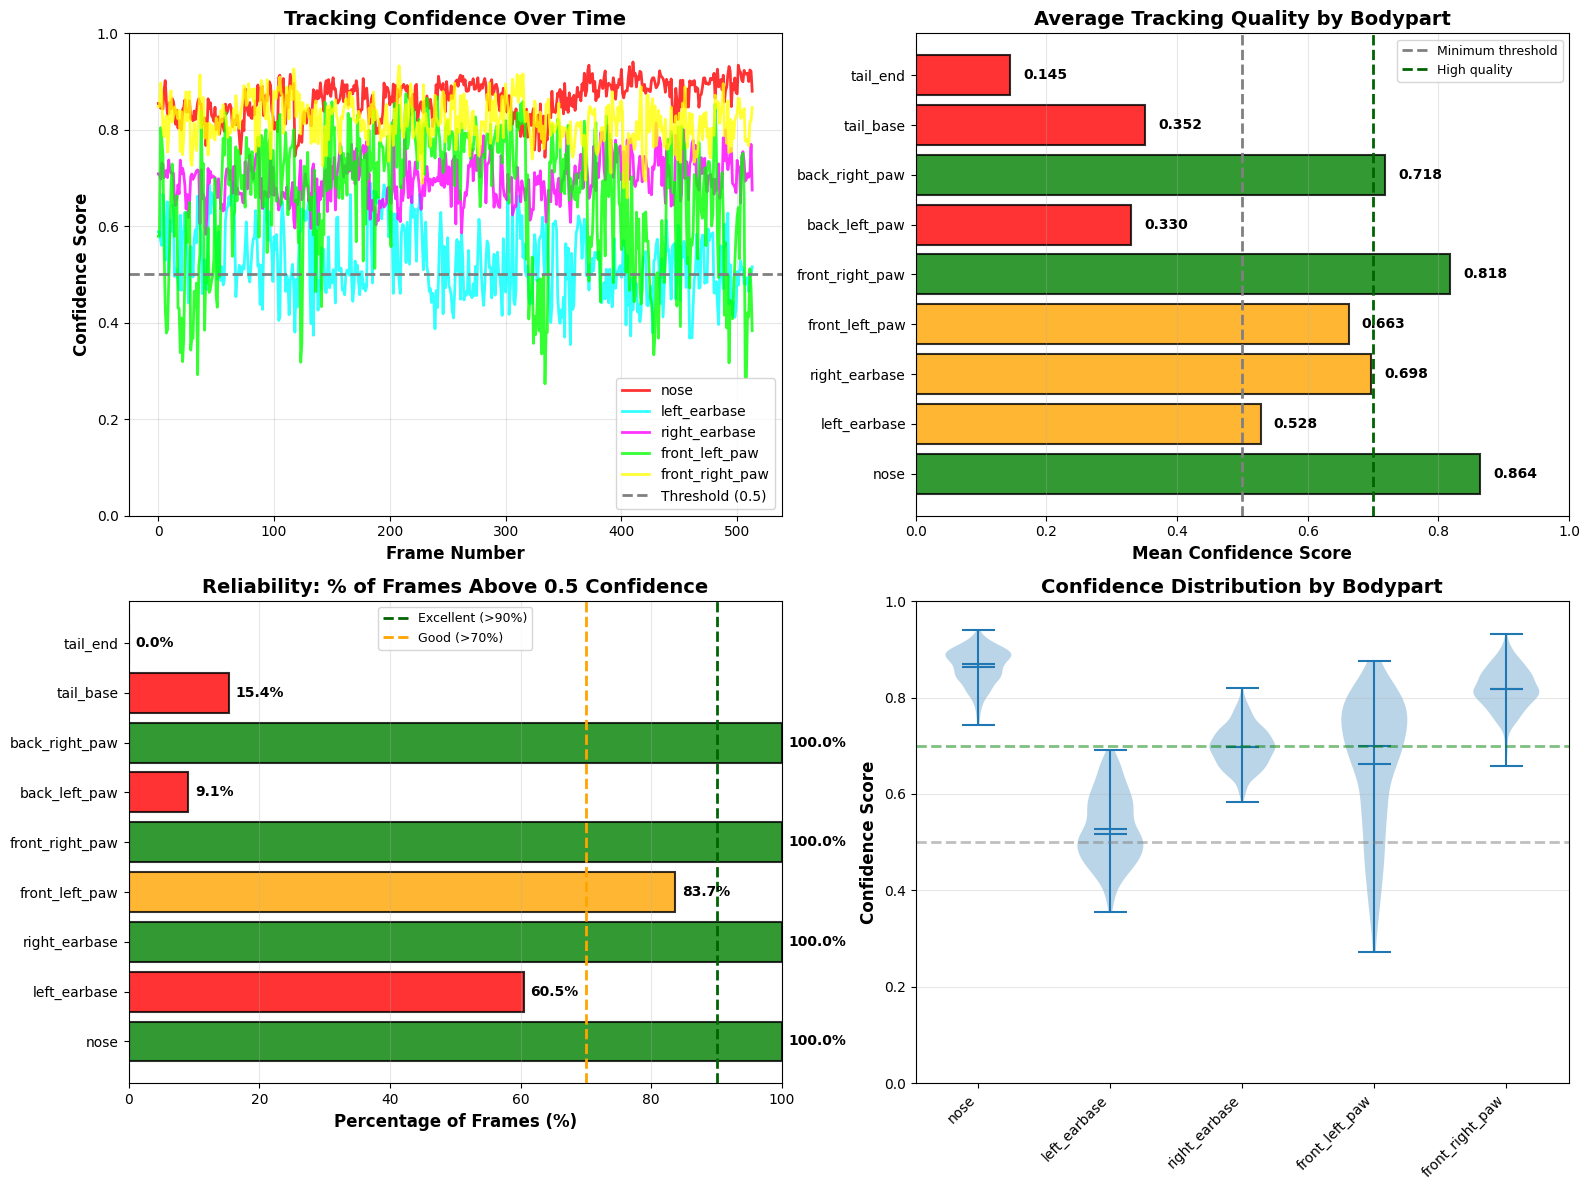

Figure 1 saved: tracking_quality_summary.png


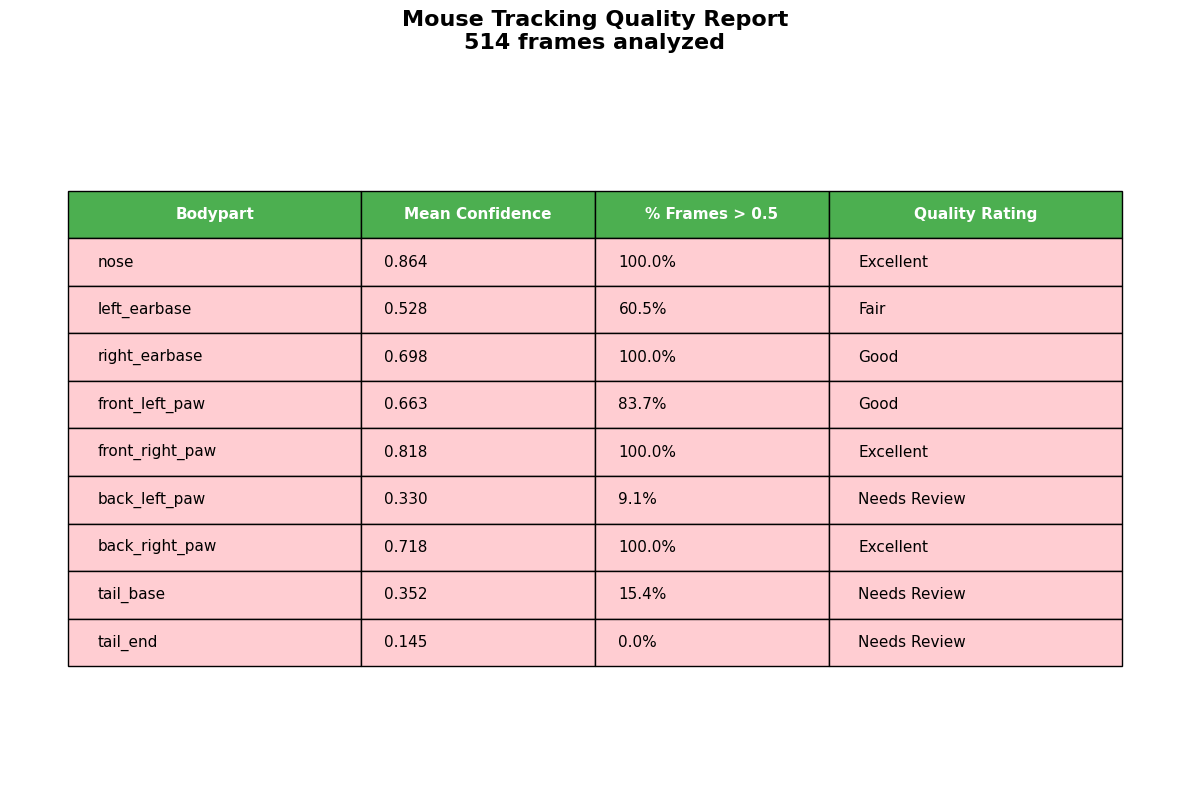

Figure 2 saved: tracking_quality_report.png


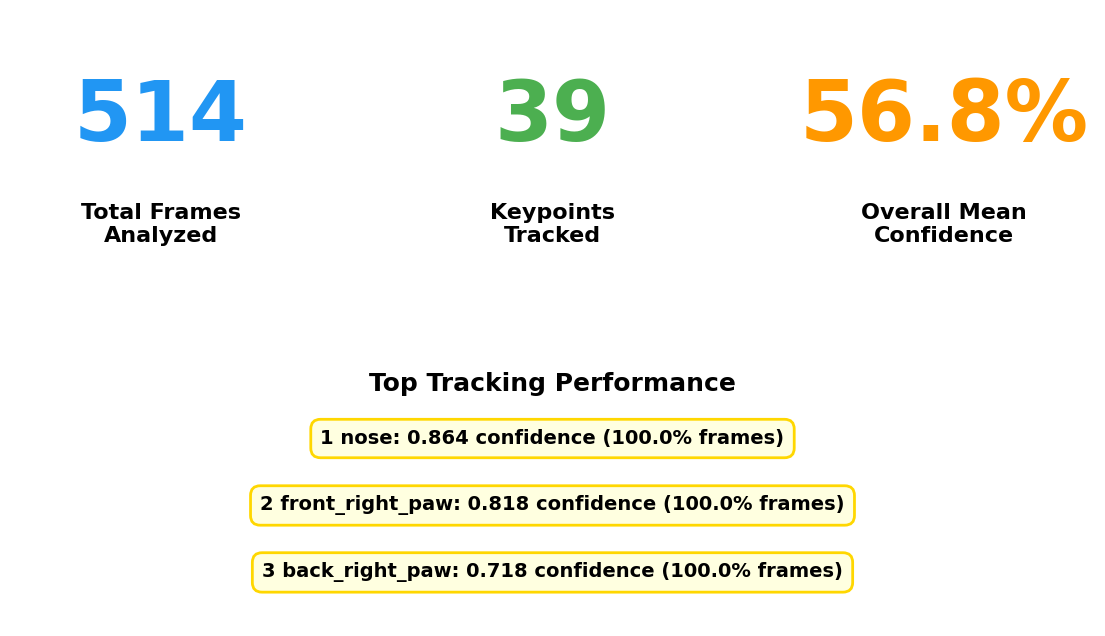

In [6]:
import seaborn as sns

# Load your tracking data
h5_file = '/content/t8SB0nr_JnsQzHam_superanimal_quadruped_hrnet_w32_fasterrcnn_resnet50_fpn_v2_.h5'
df = pd.read_hdf(h5_file)

scorer = 'superanimal_quadruped_hrnet_w32_fasterrcnn_resnet50_fpn_v2_'

# Key bodyparts to analyze
bodyparts = ['nose', 'left_earbase', 'right_earbase', 'front_left_paw', 'front_right_paw',
             'back_left_paw', 'back_right_paw', 'tail_base', 'tail_end']

# VISUALIZATION 1: Tracking Quality Summary

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Confidence over time for key bodyparts
ax1 = axes[0, 0]
colors = ['red', 'cyan', 'magenta', 'lime', 'yellow']
for bp, color in zip(['nose', 'left_earbase', 'right_earbase', 'front_left_paw', 'front_right_paw'], colors):
    conf = df[scorer]['animal0'][bp]['likelihood'].values
    ax1.plot(conf, label=bp, linewidth=2, alpha=0.8, color=color)

ax1.axhline(y=0.5, color='gray', linestyle='--', linewidth=2, label='Threshold (0.5)')
ax1.set_xlabel('Frame Number', fontsize=12, weight='bold')
ax1.set_ylabel('Confidence Score', fontsize=12, weight='bold')
ax1.set_title('Tracking Confidence Over Time', fontsize=14, weight='bold')
ax1.legend(loc='lower right', fontsize=10)
ax1.grid(True, alpha=0.3)
ax1.set_ylim([0, 1])

# 2. Mean confidence comparison (Bar chart)
ax2 = axes[0, 1]
mean_confidences = []
bodypart_names = []

for bp in bodyparts:
    try:
        conf = df[scorer]['animal0'][bp]['likelihood'].values
        mean_confidences.append(np.mean(conf))
        bodypart_names.append(bp)
    except:
        continue

# Color bars by quality
colors_bars = ['green' if c > 0.7 else 'orange' if c > 0.5 else 'red' for c in mean_confidences]

bars = ax2.barh(bodypart_names, mean_confidences, color=colors_bars, alpha=0.8, edgecolor='black', linewidth=1.5)
ax2.axvline(x=0.5, color='gray', linestyle='--', linewidth=2, label='Minimum threshold')
ax2.axvline(x=0.7, color='darkgreen', linestyle='--', linewidth=2, label='High quality')
ax2.set_xlabel('Mean Confidence Score', fontsize=12, weight='bold')
ax2.set_title('Average Tracking Quality by Bodypart', fontsize=14, weight='bold')
ax2.set_xlim([0, 1])
ax2.legend(fontsize=9)
ax2.grid(True, alpha=0.3, axis='x')

# Add value labels on bars
for i, (bar, val) in enumerate(zip(bars, mean_confidences)):
    ax2.text(val + 0.02, i, f'{val:.3f}', va='center', fontsize=10, weight='bold')

# 3. Percentage of frames above threshold
ax3 = axes[1, 0]
percentages = []

for bp in bodyparts:
    try:
        conf = df[scorer]['animal0'][bp]['likelihood'].values
        pct = (np.sum(conf > 0.5) / len(conf)) * 100
        percentages.append(pct)
    except:
        continue

colors_pct = ['green' if p > 90 else 'orange' if p > 70 else 'red' for p in percentages]
bars2 = ax3.barh(bodypart_names, percentages, color=colors_pct, alpha=0.8, edgecolor='black', linewidth=1.5)
ax3.axvline(x=90, color='darkgreen', linestyle='--', linewidth=2, label='Excellent (>90%)')
ax3.axvline(x=70, color='orange', linestyle='--', linewidth=2, label='Good (>70%)')
ax3.set_xlabel('Percentage of Frames (%)', fontsize=12, weight='bold')
ax3.set_title('Reliability: % of Frames Above 0.5 Confidence', fontsize=14, weight='bold')
ax3.set_xlim([0, 100])
ax3.legend(fontsize=9)
ax3.grid(True, alpha=0.3, axis='x')

# Add percentage labels
for i, (bar, val) in enumerate(zip(bars2, percentages)):
    ax3.text(val + 1, i, f'{val:.1f}%', va='center', fontsize=10, weight='bold')

# 4. Confidence distribution (violin plot)
ax4 = axes[1, 1]
confidence_data = []
labels = []

for bp in ['nose', 'left_earbase', 'right_earbase', 'front_left_paw', 'front_right_paw']:
    conf = df[scorer]['animal0'][bp]['likelihood'].values
    confidence_data.append(conf)
    labels.append(bp)

parts = ax4.violinplot(confidence_data, positions=range(len(labels)), showmeans=True, showmedians=True)
ax4.set_xticks(range(len(labels)))
ax4.set_xticklabels(labels, rotation=45, ha='right')
ax4.axhline(y=0.5, color='gray', linestyle='--', linewidth=2, alpha=0.5)
ax4.axhline(y=0.7, color='green', linestyle='--', linewidth=2, alpha=0.5)
ax4.set_ylabel('Confidence Score', fontsize=12, weight='bold')
ax4.set_title('Confidence Distribution by Bodypart', fontsize=14, weight='bold')
ax4.set_ylim([0, 1])
ax4.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('tracking_quality_summary.png', dpi=300, bbox_inches='tight')
plt.show()

print("Figure 1 saved: tracking_quality_summary.png")


# VISUALIZATION 2: Quality Report Card

fig, ax = plt.subplots(figsize=(12, 8))
ax.axis('off')

# Create summary table
summary_data = []
for bp in bodyparts:
    try:
        conf = df[scorer]['animal0'][bp]['likelihood'].values
        mean_conf = np.mean(conf)
        pct_above = (np.sum(conf > 0.5) / len(conf)) * 100

        if mean_conf > 0.7 and pct_above > 90:
            quality = "Excellent"
        elif mean_conf > 0.6 and pct_above > 80:
            quality = "Good"
        elif mean_conf > 0.5 and pct_above > 60:
            quality = "Fair"
        else:
            quality = "Needs Review"

        summary_data.append([bp, f"{mean_conf:.3f}", f"{pct_above:.1f}%", quality])
    except:
        continue

# Create table
table = ax.table(cellText=summary_data,
                colLabels=['Bodypart', 'Mean Confidence', '% Frames > 0.5', 'Quality Rating'],
                cellLoc='left',
                loc='center',
                colWidths=[0.25, 0.2, 0.2, 0.25])

table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1, 2.5)

# Style header
for i in range(4):
    table[(0, i)].set_facecolor('#4CAF50')
    table[(0, i)].set_text_props(weight='bold', color='white')

# Style rows based on quality
for i, row in enumerate(summary_data, start=1):
    if '3 Stars' in row[3]:
        color = '#E8F5E9'
    elif '2 Stars' in row[3]:
        color = '#FFF9C4'
    elif '1 Stars' in row[3]:
        color = '#FFE0B2'
    else:
        color = '#FFCDD2'

    for j in range(4):
        table[(i, j)].set_facecolor(color)

ax.set_title('Mouse Tracking Quality Report\n514 frames analyzed',
            fontsize=16, weight='bold', pad=20)

plt.tight_layout()
plt.savefig('tracking_quality_report.png', dpi=300, bbox_inches='tight')
plt.show()

print("Figure 2 saved: tracking_quality_report.png")

# VISUALIZATION 3: Key Statistics Infographic

fig = plt.figure(figsize=(14, 8))
gs = fig.add_gridspec(2, 3, hspace=0.3, wspace=0.3)

# Overall stats
total_frames = len(df)
nose_conf = df[scorer]['animal0']['nose']['likelihood'].values
overall_mean = np.mean([df[scorer]['animal0'][bp]['likelihood'].values.mean()
                       for bp in bodyparts if bp in df[scorer]['animal0'].columns.get_level_values(0)])

# Big number displays
ax1 = fig.add_subplot(gs[0, 0])
ax1.text(0.5, 0.6, f'{total_frames}', ha='center', va='center',
        fontsize=60, weight='bold', color='#2196F3')
ax1.text(0.5, 0.2, 'Total Frames\nAnalyzed', ha='center', va='center',
        fontsize=16, weight='bold')
ax1.axis('off')

ax2 = fig.add_subplot(gs[0, 1])
ax2.text(0.5, 0.6, '39', ha='center', va='center',
        fontsize=60, weight='bold', color='#4CAF50')
ax2.text(0.5, 0.2, 'Keypoints\nTracked', ha='center', va='center',
        fontsize=16, weight='bold')
ax2.axis('off')

ax3 = fig.add_subplot(gs[0, 2])
ax3.text(0.5, 0.6, f'{overall_mean:.1%}', ha='center', va='center',
        fontsize=60, weight='bold', color='#FF9800')
ax3.text(0.5, 0.2, 'Overall Mean\nConfidence', ha='center', va='center',
        fontsize=16, weight='bold')
ax3.axis('off')

# Top performers
ax4 = fig.add_subplot(gs[1, :])
ax4.text(0.5, 0.95, 'Top Tracking Performance', ha='center', va='top',
        fontsize=18, weight='bold', transform=ax4.transAxes)

top_3 = sorted(zip(bodypart_names, mean_confidences), key=lambda x: x[1], reverse=True)[:3]
medals = ['1', '2', '3']

y_pos = 0.7
for medal, (bp, conf) in zip(medals, top_3):
    pct = (np.sum(df[scorer]['animal0'][bp]['likelihood'].values > 0.5) / total_frames) * 100
    ax4.text(0.5, y_pos, f'{medal} {bp}: {conf:.3f} confidence ({pct:.1f}% frames)',
            ha='center', va='center', fontsize=14, weight='bold',
            transform=ax4.transAxes,
            bbox=dict(boxstyle='round,pad=0.5', facecolor='lightyellow', edgecolor='gold', linewidth=2))
    y_pos -= 0.25

ax4.axis('off')

plt.savefig('tracking_statistics_infographic.png', dpi=300, bbox_inches='tight')
plt.show()